In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 날씨 데이터 분석

In [90]:
df_wth = pd.read_csv('data/기상개황_광주지역__20230327110805(2).csv',encoding='cp949')

In [91]:
df_wth.head()

,월별,평균기온 (℃),평균최고기온 (℃),최고기온 (℃),평균최저기온 (℃),최저기온 (℃),강수량 (㎜),평균상대습도 (%),최소상대습도 (%),평균해면기압 (hPa),...,평균상대습도 (%).2,최소상대습도 (%).2,평균해면기압 (hPa).2,이슬점온도 (℃).2,평균운량 (10%).2,일조시간 (h).2,최심신적설 (㎝).2,평균풍속 (㎧).2,최대풍속 (㎧).2,최대순간풍속 (㎧).2
0,평균,14.6,20.1,38.5,10.3,-11.5,1427.9,71,5,1016.9,...,71,1,1016.9,8.4,5.6,2225.1,16.9,1.6,10.0,19.8
1,1월,-0.2,4.5,11.4,-3.8,-11.5,38.8,67,14,1024.7,...,68,13,1023.4,-1.5,6.3,136.5,-,1.4,10.0,19.8
2,2월,1.8,7.1,15.9,-2.8,-10.0,22.0,54,8,1024.0,...,67,10,1025.1,-1.3,4.9,177.0,10.9,1.4,5.5,10.8
3,3월,10.0,16.5,24.8,4.7,-3.1,115.8,72,5,1020.2,...,58,1,1018.6,-0.3,4.0,242.0,-,1.7,7.9,15.0
4,4월,15.1,21.5,30.2,9.7,1.1,127.4,67,11,1016.0,...,52,5,1018.4,0.4,3.3,278.1,-,1.8,9.1,14.8


In [92]:
# '기상개황_광주지역' 데이터 전처리

In [93]:
# 컬럼으로 쓸 목록 리스트화
col = df_wth.T.iloc[0,:].to_list()
col

['평균',
 '1월',
 '2월',
 '3월',
 '4월',
 '5월',
 '6월',
 '7월',
 '8월',
 '9월',
 '10월',
 '11월',
 '12월',
 '연도']

In [94]:
df_wth = df_wth.T.iloc[1:]

In [95]:
df_wth.columns = col

In [96]:
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 평균기온 (℃) to 최대순간풍속 (㎧).2
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   평균      48 non-null     object
 1   1월      48 non-null     object
 2   2월      48 non-null     object
 3   3월      48 non-null     object
 4   4월      48 non-null     object
 5   5월      48 non-null     object
 6   6월      48 non-null     object
 7   7월      48 non-null     object
 8   8월      48 non-null     object
 9   9월      48 non-null     object
 10  10월     48 non-null     object
 11  11월     48 non-null     object
 12  12월     48 non-null     object
 13  연도      48 non-null     object
dtypes: object(14)
memory usage: 5.6+ KB


In [97]:
df_wth.T.columns

Index(['평균기온 (℃)', '평균최고기온 (℃)', '최고기온 (℃)', '평균최저기온 (℃)', '최저기온 (℃)',
       '강수량 (㎜)', '평균상대습도 (%)', '최소상대습도 (%)', '평균해면기압 (hPa)', '이슬점온도 (℃)',
       '평균운량 (10%)', '일조시간 (h)', '최심신적설 (㎝)', '평균풍속 (㎧)', '최대풍속 (㎧)',
       '최대순간풍속 (㎧)', '평균기온 (℃).1', '평균최고기온 (℃).1', '최고기온 (℃).1',
       '평균최저기온 (℃).1', '최저기온 (℃).1', '강수량 (㎜).1', '평균상대습도 (%).1',
       '최소상대습도 (%).1', '평균해면기압 (hPa).1', '이슬점온도 (℃).1', '평균운량 (10%).1',
       '일조시간 (h).1', '최심신적설 (㎝).1', '평균풍속 (㎧).1', '최대풍속 (㎧).1', '최대순간풍속 (㎧).1',
       '평균기온 (℃).2', '평균최고기온 (℃).2', '최고기온 (℃).2', '평균최저기온 (℃).2',
       '최저기온 (℃).2', '강수량 (㎜).2', '평균상대습도 (%).2', '최소상대습도 (%).2',
       '평균해면기압 (hPa).2', '이슬점온도 (℃).2', '평균운량 (10%).2', '일조시간 (h).2',
       '최심신적설 (㎝).2', '평균풍속 (㎧).2', '최대풍속 (㎧).2', '최대순간풍속 (㎧).2'],
      dtype='object')

In [98]:
df_wth['연도'] = df_wth['연도'].astype(int)

In [99]:
# 사용하지 않을 평균 컬럼 제거
df_wth.drop(columns=['평균'],inplace=True)

In [100]:
# 파일을 연도별로 df으로 나눔
df_wth19 = df_wth[df_wth['연도']==2019].T.iloc[:-1,].drop(columns='최심신적설 (㎝).1')
df_wth19.columns=['평균기온 (℃)', '평균최고기온 (℃)', '최고기온 (℃)', '평균최저기온 (℃)', '최저기온 (℃)',
       '강수량 (㎜)', '평균상대습도 (%)', '최소상대습도 (%)', '평균해면기압 (hPa)', '이슬점온도 (℃)',
       '평균운량 (10%)', '일조시간 (h)', '평균풍속 (㎧)', '최대풍속 (㎧)', '최대순간풍속 (㎧)']

df_wth20 = df_wth[df_wth['연도']==2020].T.iloc[:-1].drop(columns='최심신적설 (㎝).2')
df_wth20.columns=['평균기온 (℃)', '평균최고기온 (℃)', '최고기온 (℃)', '평균최저기온 (℃)', '최저기온 (℃)',
       '강수량 (㎜)', '평균상대습도 (%)', '최소상대습도 (%)', '평균해면기압 (hPa)', '이슬점온도 (℃)',
       '평균운량 (10%)', '일조시간 (h)', '평균풍속 (㎧)', '최대풍속 (㎧)', '최대순간풍속 (㎧)']

In [101]:
# 날씨데이터에서 사용할 온도 df 만들기
df_dg19 = df_wth19.loc[:,['평균기온 (℃)','최고기온 (℃)', '최저기온 (℃)']]
df_dg20 = df_wth20.loc[:,['평균기온 (℃)','최고기온 (℃)', '최저기온 (℃)']]

In [102]:
df_dg19

,평균기온 (℃),최고기온 (℃),최저기온 (℃)
1월,1.8,10.5,-5.9
2월,3.6,15.6,-4.9
3월,8.4,20.7,-0.6
4월,13.0,27.9,0.9
5월,19.2,30.7,6.8
6월,22.0,31.7,13.5
7월,25.3,32.9,19.1
8월,27.0,34.8,20.1
9월,22.9,30.6,13.7
10월,17.1,28.4,6.7


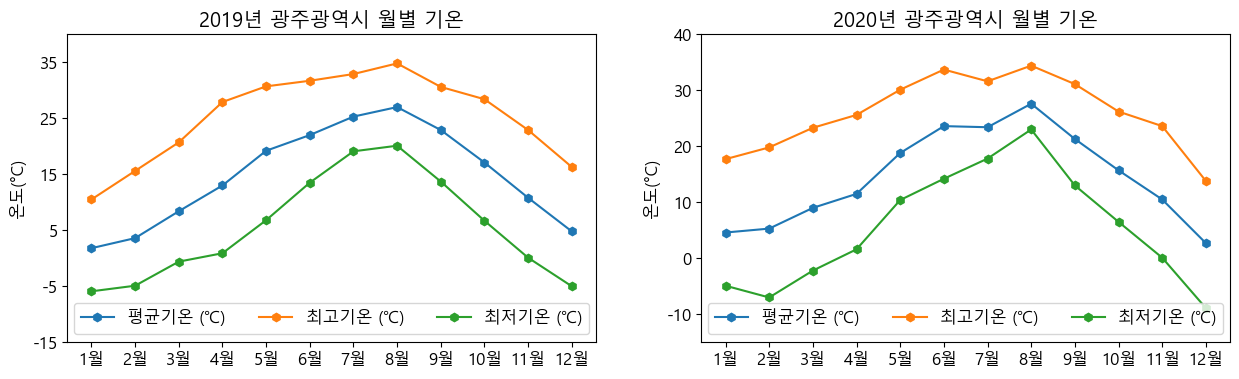

In [103]:
# 월별 광주 기온 그래프 그리기
plt.rcParams['axes.unicode_minus'] = 'False'
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,2,1)
plt.plot(df_dg19, label=['평균기온 (℃)','최고기온 (℃)','최저기온 (℃)'], marker='h', markersize=6)
plt.legend(loc='lower center', ncol=3)
plt.yticks(np.arange(-15,40,10))
plt.ylim(-15,40)
plt.title('2019년 광주광역시 월별 기온')
plt.ylabel('온도(°C)')

ax2 = fig.add_subplot(1,2,2)
plt.plot(df_dg20, label=['평균기온 (℃)', '최고기온 (℃)', '최저기온 (℃)'], marker='h', markersize=6)
plt.legend(loc='lower center', ncol=3)
plt.ylim(-15,40)
plt.title('2020년 광주광역시 월별 기온')
plt.ylabel('온도(°C)')

plt.show()

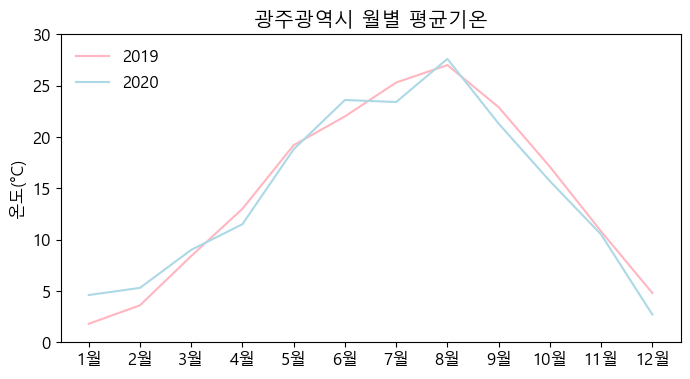

In [104]:
# 월별 평균기온 2019,2020 비교
plt.rcParams['axes.unicode_minus'] = 'False'
df_me19 = df_wth19[['평균기온 (℃)']]
df_me20 = df_wth20[['평균기온 (℃)']]

fig = plt.figure(figsize=(8,4))

plt.plot(df_me19, label='2019', color='lightpink', linestyle='-')
plt.plot(df_me20, label='2020', color ='lightblue',linestyle='-')
plt.ylim(0,30)
plt.title('광주광역시 월별 평균기온')
plt.ylabel('온도(°C)')
plt.legend(loc='upper left',frameon=False)

plt.show()

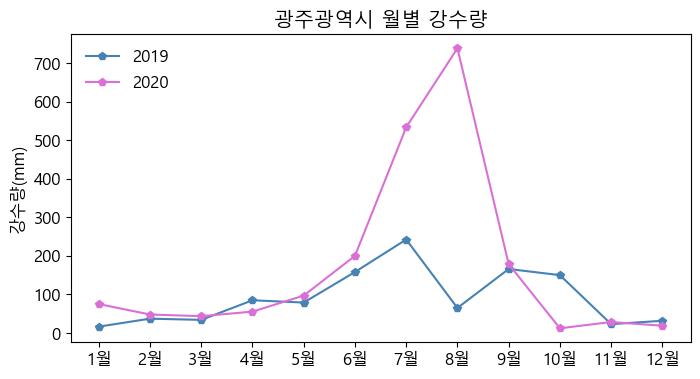

In [105]:
# 월별 강수량 2019,2020 비교
# df_rain : 강수량 df
df_rain19 = df_wth19[['강수량 (㎜)']]
df_rain20 = df_wth20[['강수량 (㎜)']]

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
plt.plot(df_rain19, label='2019', marker='p', markersize=6, color='steelblue')
plt.plot(df_rain20, label='2020', marker='p', markersize=6, color='orchid')
plt.title('광주광역시 월별 강수량')
plt.ylabel('강수량(mm)')
plt.legend(loc='upper left',frameon=False)

plt.show()

In [106]:
# 월별 일조시간 2019,2020 비교
# df_sh : 일조량 df
df_sh19 = df_wth19[['일조시간 (h)']]
df_sh20 = df_wth20[['일조시간 (h)']]
df_sh19

,일조시간 (h)
1월,212.7
2월,165.6
3월,212.0
4월,174.0
5월,289.3
6월,196.8
7월,140.5
8월,192.2
9월,145.8
10월,205.7


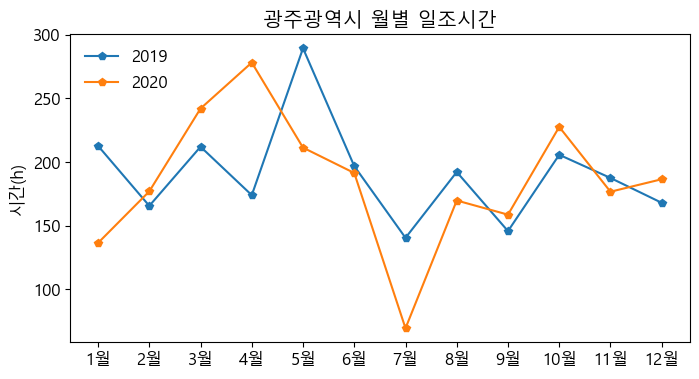

In [107]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
plt.plot(df_sh19, label='2019', marker='p', markersize=6)
plt.plot(df_sh20, label='2020', marker='p', markersize=6)

plt.title('광주광역시 월별 일조시간')
plt.ylabel('시간(h)')
plt.legend(loc='upper left',frameon=False)

# plt.bar(df_sh19.index, df_sh19['일조시간 (h)'], label='2019')
# plt.bar(df_sh20.index, df_sh20['일조시간 (h)'], label='2020')

# sns.barplot(x=df_sh19.index, y='일조시간 (h)', data=df_sh19, errwidth=0)
# sns.barplot(x=df_sh20.index, y='일조시간 (h)', data=df_sh20, errwidth=0)


plt.show()

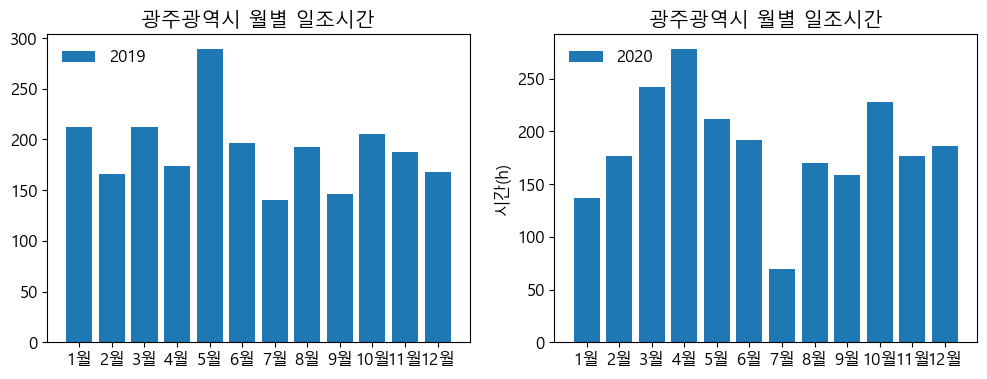

In [108]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
# plt.plot(df_sh19, label='2019', marker='p', markersize=6)
# plt.plot(df_sh20, label='2020', marker='p', markersize=6)
plt.bar(df_sh19.index, df_sh19['일조시간 (h)'], label='2019')
plt.title('광주광역시 월별 일조시간')
plt.legend(loc='upper left',frameon=False)

ax2 = fig.add_subplot(122)
plt.bar(df_sh20.index, df_sh20['일조시간 (h)'], label='2020')
plt.title('광주광역시 월별 일조시간')
plt.ylabel('시간(h)')
plt.legend(loc='upper left',frameon=False)

# sns.barplot(x=df_sh19.index, y='일조시간 (h)', data=df_sh19, errwidth=0)
# sns.barplot(x=df_sh20.index, y='일조시간 (h)', data=df_sh20, errwidth=0)


plt.show()

## 날씨데이터와 전력데이터 합치기

In [109]:
# 월별 평균 전력사용량 데이터 합치기

In [110]:
df_wth19['전력사용량 (kWh)'] = [463.71999999999997,460.98,403.58000000000004,426.3,398.3,401.48,419.36,563.6800000000001,509.5,412.73999999999995,413.58000000000004,432.7]
df_wth20['전력사용량 (kWh)'] = [466.6,470.38,439.12,447.28000000000003,420.48,432.14,448.26000000000005,547.74,599.1800000000001,422.98,434.43999999999994,458.41999999999996]

In [111]:
df_wth20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1월 to 12월
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   평균기온 (℃)      12 non-null     object 
 1   평균최고기온 (℃)    12 non-null     object 
 2   최고기온 (℃)      12 non-null     object 
 3   평균최저기온 (℃)    12 non-null     object 
 4   최저기온 (℃)      12 non-null     object 
 5   강수량 (㎜)       12 non-null     object 
 6   평균상대습도 (%)    12 non-null     object 
 7   최소상대습도 (%)    12 non-null     object 
 8   평균해면기압 (hPa)  12 non-null     object 
 9   이슬점온도 (℃)     12 non-null     object 
 10  평균운량 (10%)    12 non-null     object 
 11  일조시간 (h)      12 non-null     object 
 12  평균풍속 (㎧)      12 non-null     object 
 13  최대풍속 (㎧)      12 non-null     object 
 14  최대순간풍속 (㎧)    12 non-null     object 
 15  전력사용량 (kWh)   12 non-null     float64
dtypes: float64(1), object(15)
memory usage: 1.6+ KB


In [112]:
# 2019,2020 날씨 데이터 병합
df_wth1920 = pd.concat([df_wth19,df_wth20])

In [113]:
df_wth1920.drop(columns='평균해면기압 (hPa)',inplace=True)

In [114]:
df_wth1920

,평균기온 (℃),평균최고기온 (℃),최고기온 (℃),평균최저기온 (℃),최저기온 (℃),강수량 (㎜),평균상대습도 (%),최소상대습도 (%),이슬점온도 (℃),평균운량 (10%),일조시간 (h),평균풍속 (㎧),최대풍속 (㎧),최대순간풍속 (㎧),전력사용량 (kWh)
1월,1.8,7.0,10.5,-2.1,-5.9,16.4,59,7,-6.1,4.1,212.7,1.4,5.4,10.8,463.72
2월,3.6,9.0,15.6,-0.7,-4.9,37.0,58,8,-5.0,5.8,165.6,1.5,6.5,13.4,460.98
3월,8.4,14.7,20.7,3.4,-0.6,33.9,61,9,0.3,4.8,212.0,1.7,9.1,16.9,403.58
4월,13.0,18.8,27.9,8.4,0.9,84.7,67,10,5.6,5.8,174.0,1.5,8.0,16.2,426.30
5월,19.2,26.2,30.7,13.1,6.8,78.8,58,11,9.2,4.4,289.3,1.6,7.2,13.1,398.30
6월,22.0,27.4,31.7,17.9,13.5,158.0,79,28,17.5,6.0,196.8,1.3,5.8,9.8,401.48
7월,25.3,29.4,32.9,22.4,19.1,242.2,84,31,22.1,7.4,140.5,1.8,7.6,13.6,419.36
8월,27.0,31.3,34.8,23.8,20.1,64.8,80,37,23.0,6.4,192.2,1.5,6.0,13.8,563.68
9월,22.9,27.2,30.6,19.6,13.7,165.8,82,25,19.3,6.5,145.8,1.6,12.5,23.5,509.50
10월,17.1,22.2,28.4,13.0,6.7,149.9,74,22,11.6,4.7,205.7,1.2,7.4,12.5,412.74


In [115]:
# 그래프를 그려보기 위해 실수값으로 변경
df_wth1920 = df_wth1920.astype(float)

In [116]:
df_wth1920.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1월 to 12월
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   평균기온 (℃)     24 non-null     float64
 1   평균최고기온 (℃)   24 non-null     float64
 2   최고기온 (℃)     24 non-null     float64
 3   평균최저기온 (℃)   24 non-null     float64
 4   최저기온 (℃)     24 non-null     float64
 5   강수량 (㎜)      24 non-null     float64
 6   평균상대습도 (%)   24 non-null     float64
 7   최소상대습도 (%)   24 non-null     float64
 8   이슬점온도 (℃)    24 non-null     float64
 9   평균운량 (10%)   24 non-null     float64
 10  일조시간 (h)     24 non-null     float64
 11  평균풍속 (㎧)     24 non-null     float64
 12  최대풍속 (㎧)     24 non-null     float64
 13  최대순간풍속 (㎧)   24 non-null     float64
 14  전력사용량 (kWh)  24 non-null     float64
dtypes: float64(15)
memory usage: 3.0+ KB


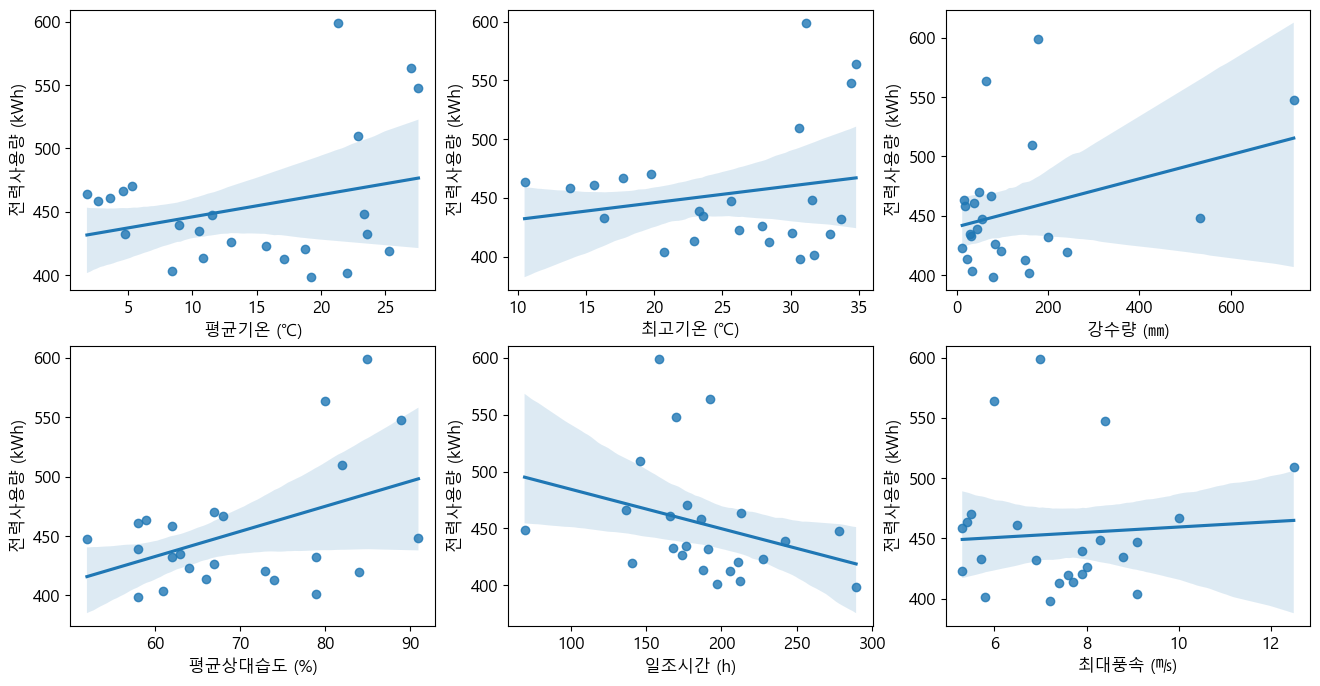

In [117]:
# 월별 2년 데이터를 regplot
features = ['평균기온 (℃)','최고기온 (℃)','강수량 (㎜)','평균상대습도 (%)','일조시간 (h)', '최대풍속 (㎧)']
fig , axs = plt.subplots(figsize=(16,8),ncols=3,nrows=2)
for i, feature in enumerate(features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='전력사용량 (kWh)', data=df_wth1920, ax = axs[row][col])

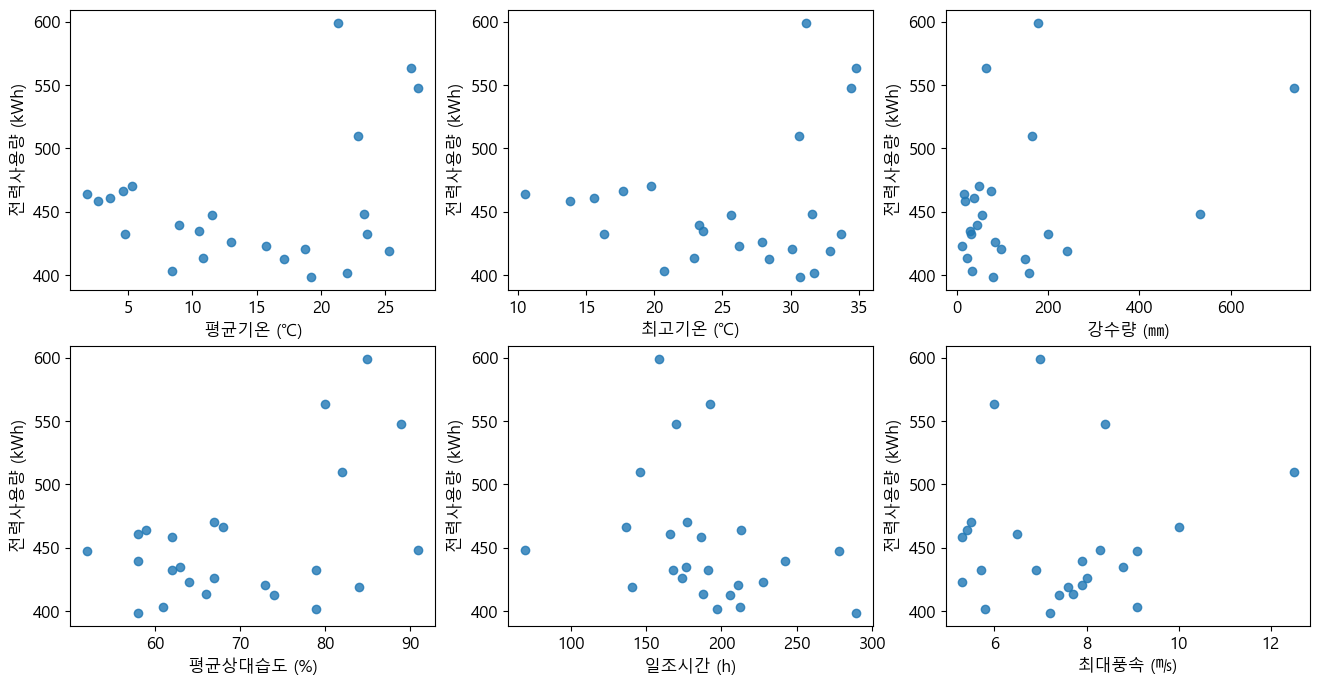

In [118]:
# 월별 2년 데이터를 산점도 그래프
features = ['평균기온 (℃)','최고기온 (℃)','강수량 (㎜)','평균상대습도 (%)','일조시간 (h)', '최대풍속 (㎧)']
fig , axs = plt.subplots(figsize=(16,8),ncols=3,nrows=2)
for i, feature in enumerate(features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='전력사용량 (kWh)', data=df_wth1920, ax = axs[row][col], fit_reg=False)

In [119]:
# 각 그래프들의 상관계수 출력
features = ['평균기온 (℃)','최고기온 (℃)','강수량 (㎜)','평균상대습도 (%)','일조시간 (h)', '최대풍속 (㎧)']
for i in features:
    print(np.round(df_wth1920[i].corr(df_wth1920['전력사용량 (kWh)']),3))

0.28
0.194
0.332
0.45
-0.304
0.072


<AxesSubplot:>

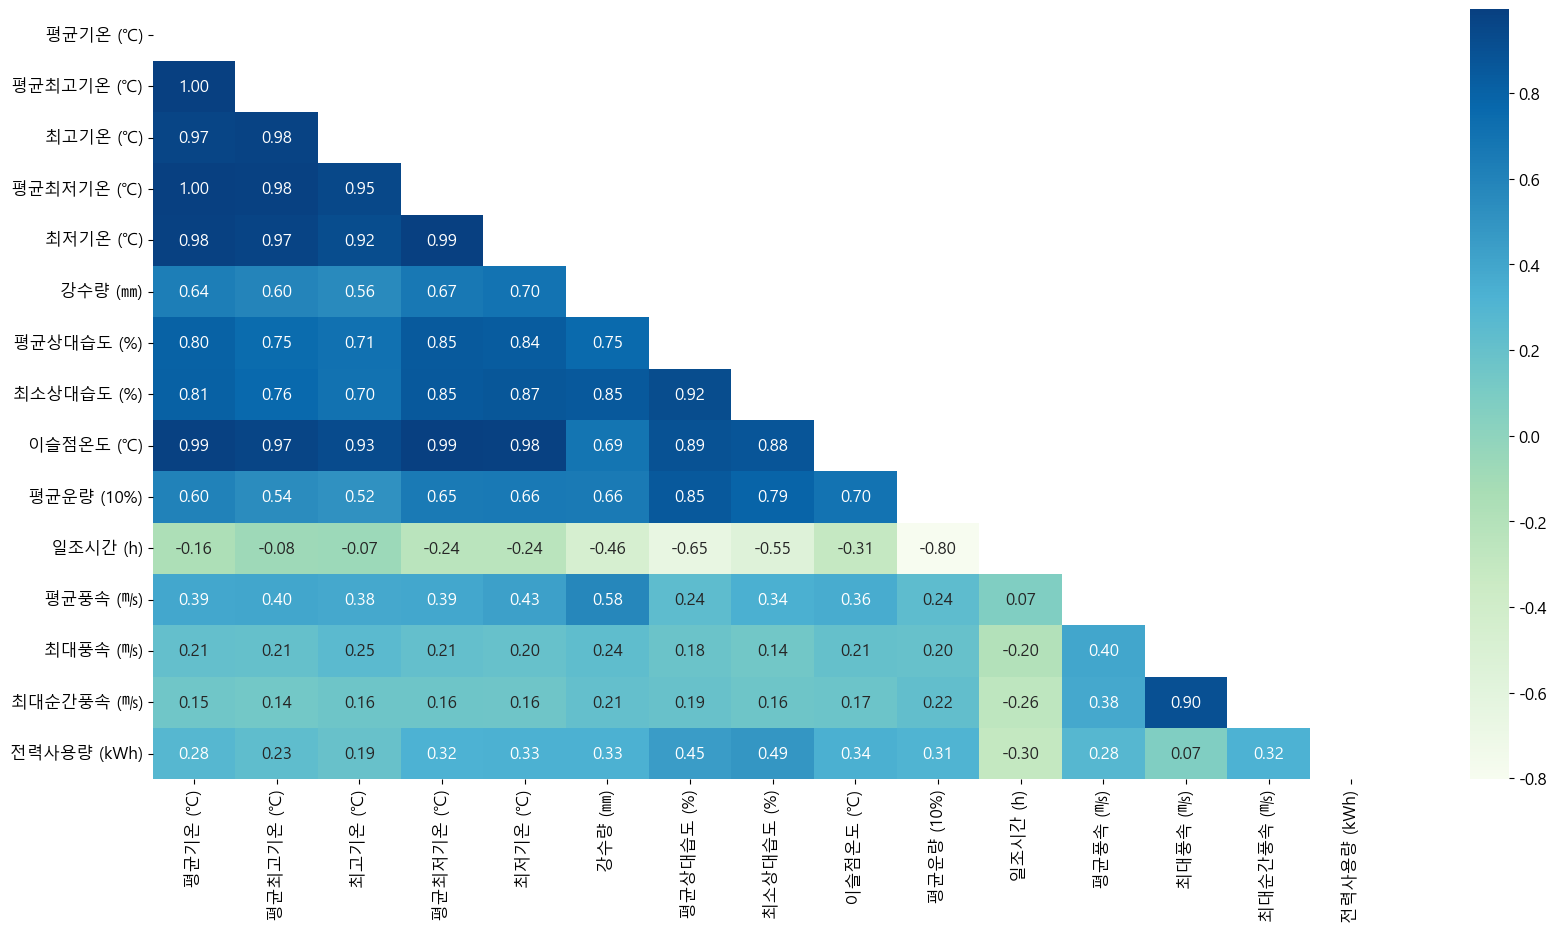

In [120]:
# 날씨 요소들 간 상간계수 테이블
mask = np.triu(np.ones_like(df_wth1920.corr(),dtype=np.bool))
plt.figure(figsize=(20,10))
sns.heatmap(df_wth1920.corr(),fmt='.2f', cmap='GnBu',mask=mask, annot=True)
# annot=True

In [121]:
# 결국은 데이터 양이 너무 적어서 날씨와 전력사용량간 유의미한 관계를 도출하기 어려웠다

## 일별 기온 데이터, 전력 데이터 연결하기

In [122]:
# 2019~2021 기온데이터 전처리

In [123]:
df_temp = pd.read_csv('data/2019_2022기온.csv', encoding='cp949')
df_temp.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t2019-01-01,156,0.0,-2.3,2.4
1,\t2019-01-02,156,-0.1,-2.8,4.2
2,\t2019-01-03,156,0.5,-3.5,6.5
3,\t2019-01-04,156,0.7,-4.1,3.9
4,\t2019-01-05,156,2.0,-2.1,6.9


In [124]:
df_temp['날짜'] = df_temp['날짜'].str.replace('\t','')

In [125]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       1096 non-null   object 
 1   지점       1096 non-null   int64  
 2   평균기온(℃)  1096 non-null   float64
 3   최저기온(℃)  1096 non-null   float64
 4   최고기온(℃)  1096 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 42.9+ KB


In [126]:
df_temp.dropna(inplace=True)

In [127]:
df_temp.drop(columns='지점',inplace=True)

In [128]:
df_temp

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2019-01-01,0.0,-2.3,2.4
1,2019-01-02,-0.1,-2.8,4.2
2,2019-01-03,0.5,-3.5,6.5
3,2019-01-04,0.7,-4.1,3.9
4,2019-01-05,2.0,-2.1,6.9
...,...,...,...,...
1091,2021-12-27,-2.1,-7.7,4.4
1092,2021-12-28,3.3,-0.1,8.2
1093,2021-12-29,4.5,0.6,9.8
1094,2021-12-30,1.9,-0.5,6.0


In [129]:
# df_temp연도 : 각각 연도별 기온 df
df_temp19 = df_temp[df_temp['날짜'].str.split('-').str[0] == '2019']
df_temp20 = df_temp[df_temp['날짜'].str.split('-').str[0] == '2020']
df_temp21 = df_temp[df_temp['날짜'].str.split('-').str[0] == '2021']

In [130]:
df_temp19

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2019-01-01,0.0,-2.3,2.4
1,2019-01-02,-0.1,-2.8,4.2
2,2019-01-03,0.5,-3.5,6.5
3,2019-01-04,0.7,-4.1,3.9
4,2019-01-05,2.0,-2.1,6.9
...,...,...,...,...
360,2019-12-27,3.0,0.5,6.8
361,2019-12-28,3.4,-1.2,9.6
362,2019-12-29,4.2,1.0,6.0
363,2019-12-30,6.5,1.7,11.1


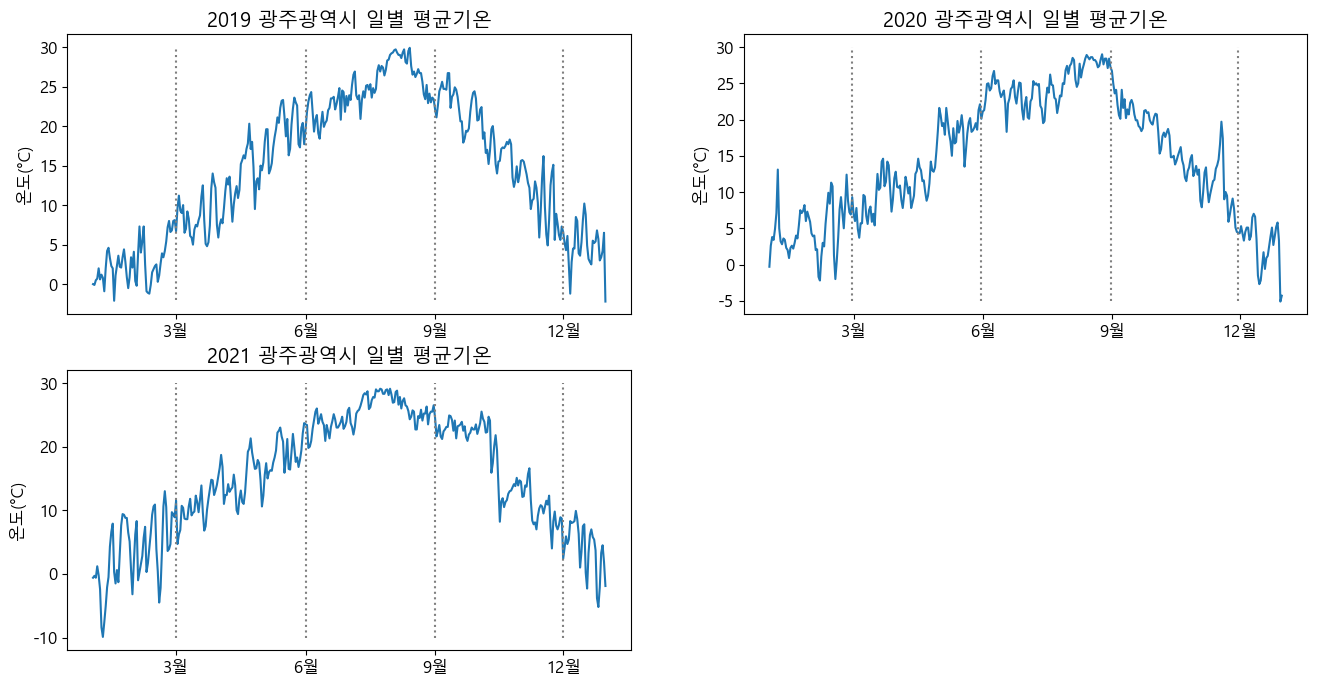

In [131]:
# 일별 평균기온 그래프 2019~2021
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(221)
plt.plot(df_temp19['날짜'],df_temp19['평균기온(℃)'])
# plt.gca().axes.xaxis.set_visible(False)
plt.title('2019 광주광역시 일별 평균기온')
plt.xticks(['2019-03-01','2019-06-01','2019-09-01','2019-12-01'],labels=['3월','6월','9월','12월'])
plt.vlines([59,151,243,334],-2,30, linestyle=':', color='gray')
plt.ylabel('온도(°C)')

ax2 = fig.add_subplot(222)
plt.plot(df_temp20['날짜'],df_temp20['평균기온(℃)'])
plt.xticks(['2020-03-01','2020-06-01','2020-09-01','2020-12-01'],labels=['3월','6월','9월','12월'])
plt.vlines([59,151,243,334],-5,30, linestyle=':', color='gray')
plt.title('2020 광주광역시 일별 평균기온')
plt.ylabel('온도(°C)')

ax3 = fig.add_subplot(223)
plt.plot(df_temp21['날짜'],df_temp21['평균기온(℃)'])
plt.xticks(['2021-03-01','2021-06-01','2021-09-01','2021-12-01'],labels=['3월','6월','9월','12월'])
plt.vlines([59,151,243,334],-10,30, linestyle=':', color='gray')
plt.title('2021 광주광역시 일별 평균기온')
plt.ylabel('온도(°C)')


plt.show()

In [132]:
# 2019~2021 전력데이터 전처리

In [133]:
df_elect = pd.read_csv('data/2013_2020 수요관리후 발전단 전력수요실적.csv', encoding='cp949')

In [134]:
df_elect.tail()

,날짜,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
2917,2020-12-27,59378,56984,55568,55007,55175,55870,56503,56728,56888,...,57661,58572,59927,62039,62840,61997,60962,59703,60057,60440
2918,2020-12-28,57699,55644,54525,54326,55082,57055,60570,66639,75118,...,69683,71308,74127,74000,72438,70428,68567,66127,65029,66518
2919,2020-12-29,63123,60961,59911,59540,60098,61575,64587,69455,76606,...,78370,78486,78915,77153,74907,72669,70631,67993,67054,68864
2920,2020-12-30,65936,63843,62679,62467,63020,64566,67875,73207,81264,...,81298,82068,83569,82003,79549,76708,74185,70985,69894,71262
2921,2020-12-31,68206,66113,64646,64090,64286,65277,67840,72025,79049,...,75461,75222,75001,73365,71347,68988,67383,65244,64935,67517


In [135]:
df_elect2 = pd.read_csv('data/한국전력거래소_시간별_전력수요량_20211231.csv', encoding='cp949')

In [136]:
df_elect2

,날짜,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2021-01-01,64942,62593,60905,59889,59638,59936,60193,59982,59626,...,56691,58299,60425,62931,64176,63645,62754,61561,61979,63055
1,2021-01-02,60658,58603,57309,56663,56733,57327,58378,59285,60669,...,55493,57865,61407,64223,65082,64257,62981,61686,61962,64227
2,2021-01-03,61992,59723,58310,57599,57518,58073,58877,59373,59434,...,59465,61355,63202,65426,66473,65646,64815,63289,63706,64480
3,2021-01-04,62078,60011,58936,58715,59233,61081,64908,71659,80766,...,81315,81431,82840,81666,78838,75717,72867,69726,68460,70327
4,2021-01-05,67267,64957,63471,63136,63564,65045,68221,73685,81609,...,81611,82647,84497,83721,81513,78460,75423,72053,70992,72838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,66465,64473,63140,62540,63122,65025,69117,76487,86054,...,88435,89654,90708,88653,85067,81527,78245,74696,73048,74217
361,2021-12-28,71059,68940,67701,67076,67184,68598,72033,78270,86809,...,87226,87627,88077,85978,83052,80011,77035,73589,71856,72875
362,2021-12-29,69651,67276,65941,65136,65534,66910,70309,75972,84106,...,82446,82500,83608,82009,79711,77646,75511,72342,70829,71882
363,2021-12-30,68581,66406,65155,64639,65121,66804,70225,75906,83494,...,81928,83044,84564,82901,80604,78216,76176,73142,71610,72472


In [137]:
# df_elect연도 : 각각 연도별 전력 df
df_elect19 = df_elect[df_elect['날짜'].str.split('-').str[0] == '2019']
df_elect20 = df_elect[df_elect['날짜'].str.split('-').str[0] == '2020'].reset_index(drop=True)
df_elect21 = df_elect2[df_elect2['날짜'].str.split('-').str[0] == '2021'].reset_index(drop=True)

In [138]:
df_elect21

,날짜,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2021-01-01,64942,62593,60905,59889,59638,59936,60193,59982,59626,...,56691,58299,60425,62931,64176,63645,62754,61561,61979,63055
1,2021-01-02,60658,58603,57309,56663,56733,57327,58378,59285,60669,...,55493,57865,61407,64223,65082,64257,62981,61686,61962,64227
2,2021-01-03,61992,59723,58310,57599,57518,58073,58877,59373,59434,...,59465,61355,63202,65426,66473,65646,64815,63289,63706,64480
3,2021-01-04,62078,60011,58936,58715,59233,61081,64908,71659,80766,...,81315,81431,82840,81666,78838,75717,72867,69726,68460,70327
4,2021-01-05,67267,64957,63471,63136,63564,65045,68221,73685,81609,...,81611,82647,84497,83721,81513,78460,75423,72053,70992,72838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,66465,64473,63140,62540,63122,65025,69117,76487,86054,...,88435,89654,90708,88653,85067,81527,78245,74696,73048,74217
361,2021-12-28,71059,68940,67701,67076,67184,68598,72033,78270,86809,...,87226,87627,88077,85978,83052,80011,77035,73589,71856,72875
362,2021-12-29,69651,67276,65941,65136,65534,66910,70309,75972,84106,...,82446,82500,83608,82009,79711,77646,75511,72342,70829,71882
363,2021-12-30,68581,66406,65155,64639,65121,66804,70225,75906,83494,...,81928,83044,84564,82901,80604,78216,76176,73142,71610,72472


In [139]:
df_elect20.isnull().sum()

날짜     0
1시     0
2시     0
3시     0
4시     0
5시     0
6시     0
7시     0
8시     0
9시     0
10시    0
11시    0
12시    0
13시    0
14시    0
15시    0
16시    0
17시    0
18시    0
19시    0
20시    0
21시    0
22시    0
23시    0
24시    0
dtype: int64

In [140]:
# 총전력량 데이터를 기온 데이터에 합치기

In [141]:
df_temp20.reset_index(drop=True,inplace=True)
df_temp21.reset_index(drop=True,inplace=True)

In [142]:
df_temp19['총전력량'] = df_elect19.sum(axis=1).reset_index(drop=True)
df_temp20['총전력량'] = df_elect20.sum(axis=1).reset_index(drop=True)
df_temp21['총전력량'] = df_elect21.sum(axis=1).reset_index(drop=True)

In [143]:
df_temp19

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),총전력량
0,2019-01-01,0.0,-2.3,2.4,1464754
1,2019-01-02,-0.1,-2.8,4.2,1751790
2,2019-01-03,0.5,-3.5,6.5,1812286
3,2019-01-04,0.7,-4.1,3.9,1816489
4,2019-01-05,2.0,-2.1,6.9,1603560
...,...,...,...,...,...
360,2019-12-27,3.0,0.5,6.8,1674305
361,2019-12-28,3.4,-1.2,9.6,1484633
362,2019-12-29,4.2,1.0,6.0,1417354
363,2019-12-30,6.5,1.7,11.1,1594480


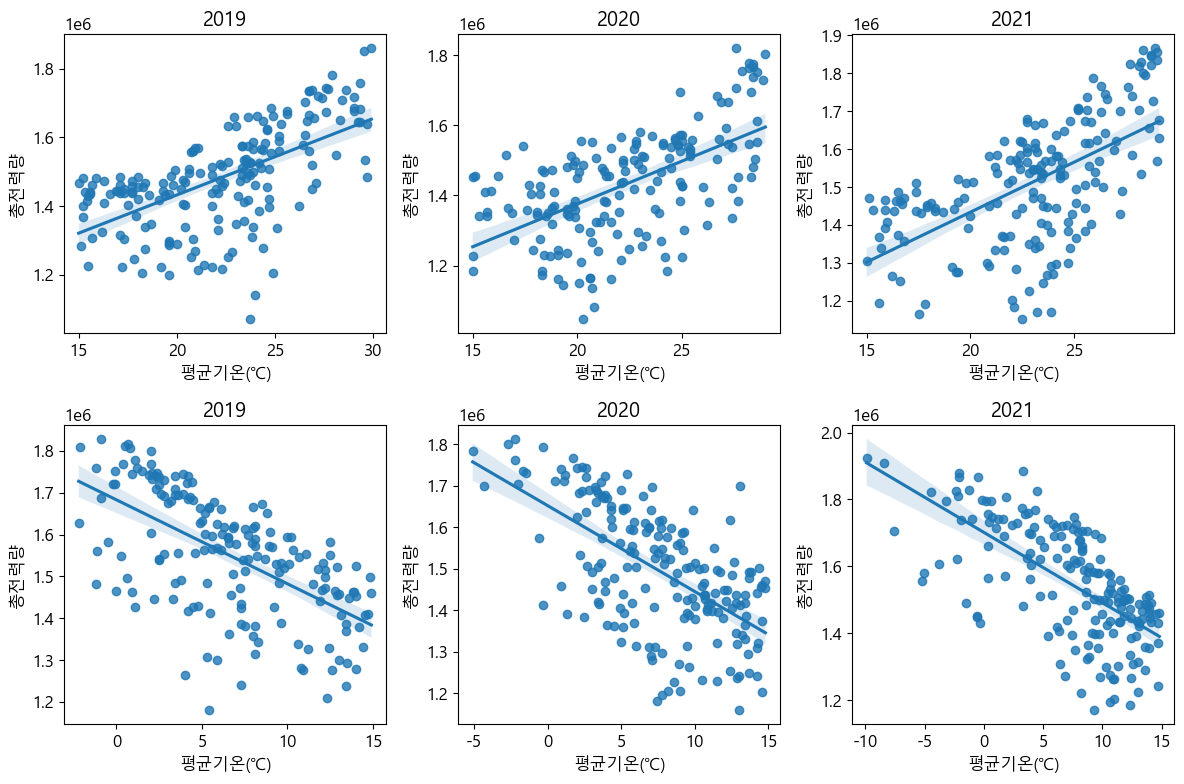

In [144]:
# 2019,2020,2021 일별데이터 regplot (15도 기준으로 나눔)
fig , axs = plt.subplots(figsize=(12,8),ncols=3,nrows=2)
d1=sns.regplot(x='평균기온(℃)', y='총전력량', data=df_temp19[df_temp19['평균기온(℃)']>=15], ax=axs[0][0])
d1.set(title='2019')
d2=sns.regplot(x='평균기온(℃)', y='총전력량', data=df_temp20[df_temp20['평균기온(℃)']>=15], ax =axs[0][1])
d2.set(title='2020')
d3=sns.regplot(x='평균기온(℃)', y='총전력량', data=df_temp21[df_temp21['평균기온(℃)']>=15], ax =axs[0][2])
d3.set(title='2021')
d4 = sns.regplot(x='평균기온(℃)', y='총전력량', data=df_temp19[df_temp19['평균기온(℃)']<15], ax=axs[1][0])
d4.set(title='2019')
d5 = sns.regplot(x='평균기온(℃)', y='총전력량', data=df_temp20[df_temp20['평균기온(℃)']<15], ax =axs[1][1])
d5.set(title='2020')
d6 = sns.regplot(x='평균기온(℃)', y='총전력량', data=df_temp21[df_temp21['평균기온(℃)']<15], ax =axs[1][2])
d6.set(title='2021')
plt.tight_layout()

In [145]:
# 15도 기준으로 연도별 데이터를 2개로 나눔
df_temp19_up = df_temp19[df_temp19['평균기온(℃)']>=15]
df_temp19_down = df_temp19[df_temp19['평균기온(℃)']<15]
df_temp20_up = df_temp20[df_temp20['평균기온(℃)']>=15]
df_temp20_down = df_temp20[df_temp20['평균기온(℃)']<15]
df_temp21_up = df_temp21[df_temp21['평균기온(℃)']>=15]
df_temp21_down = df_temp21[df_temp21['평균기온(℃)']<15]

In [146]:
# 각각의 상관계수 
df = [df_temp19_up['평균기온(℃)'].corr(df_temp19_up['총전력량']),
df_temp19_down['평균기온(℃)'].corr(df_temp19_down['총전력량']),
df_temp20_up['평균기온(℃)'].corr(df_temp20_up['총전력량']),
df_temp20_down['평균기온(℃)'].corr(df_temp20_down['총전력량']),
df_temp21_up['평균기온(℃)'].corr(df_temp21_up['총전력량']),
df_temp21_down['평균기온(℃)'].corr(df_temp21_down['총전력량'])]

for i in df :
    print('corr : '+str(np.round(i,3)))

corr : 0.598
corr : -0.607
corr : 0.577
corr : -0.613
corr : 0.593
corr : -0.659


In [147]:
# 연도별 온도데이터를 3개년 합함
df_temp192021 = pd.concat([df_temp19, df_temp20, df_temp21])

In [148]:
df_temp192021.reset_index(drop=True, inplace=True)

In [149]:
df_temp192021

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),총전력량
0,2019-01-01,0.0,-2.3,2.4,1464754
1,2019-01-02,-0.1,-2.8,4.2,1751790
2,2019-01-03,0.5,-3.5,6.5,1812286
3,2019-01-04,0.7,-4.1,3.9,1816489
4,2019-01-05,2.0,-2.1,6.9,1603560
...,...,...,...,...,...
1091,2021-12-27,-2.1,-7.7,4.4,1866034
1092,2021-12-28,3.3,-0.1,8.2,1885147
1093,2021-12-29,4.5,0.6,9.8,1824812
1094,2021-12-30,1.9,-0.5,6.0,1807564


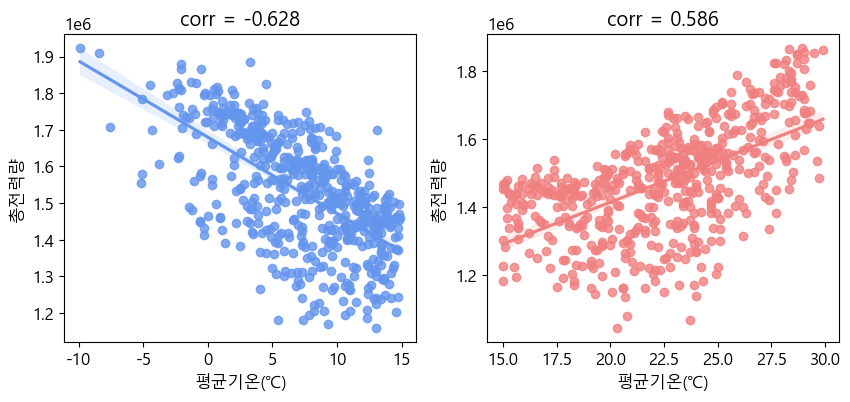

In [150]:
# 2019~2021 총3년 일별데이터 regplot
fig , axs = plt.subplots(figsize=(10,4),ncols=2,nrows=1)

df_temp192021_up = df_temp192021[df_temp192021['평균기온(℃)']>=15]
df_temp192021_down = df_temp192021[df_temp192021['평균기온(℃)']<15]

d1 = sns.regplot(x='평균기온(℃)', y='총전력량', data=df_temp192021[df_temp192021['평균기온(℃)']<15], ax=axs[0], color='cornflowerblue')
d1.set(title='corr = '+str(np.round(df_temp192021_down['평균기온(℃)'].corr(df_temp192021_down['총전력량']),3)))
d2 = sns.regplot(x='평균기온(℃)', y='총전력량', data=df_temp192021[df_temp192021['평균기온(℃)']>=15], ax=axs[1], color='lightcoral')
d2.set(title='corr = '+str(np.round(df_temp192021_up['평균기온(℃)'].corr(df_temp192021_up['총전력량']),3)))
plt.show()

In [151]:
df_temp192021.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),총전력량
0,2019-01-01,0.0,-2.3,2.4,1464754
1,2019-01-02,-0.1,-2.8,4.2,1751790
2,2019-01-03,0.5,-3.5,6.5,1812286
3,2019-01-04,0.7,-4.1,3.9,1816489
4,2019-01-05,2.0,-2.1,6.9,1603560


In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [153]:
# y_train은 2019,2020년 총전력량 df
y = df_temp192021['총전력량']
y_train = y.iloc[:729]

In [154]:
# x_train은 2019,2020년 평균,최저,최고기온 df
X = df_temp192021[['평균기온(℃)','최저기온(℃)',	'최고기온(℃)']]
X_train = X.iloc[:729]

In [155]:
X_train

,평균기온(℃),최저기온(℃),최고기온(℃)
0,0.0,-2.3,2.4
1,-0.1,-2.8,4.2
2,0.5,-3.5,6.5
3,0.7,-4.1,3.9
4,2.0,-2.1,6.9
...,...,...,...
724,2.7,-0.1,7.2
725,3.9,-1.3,10.1
726,5.2,3.8,6.7
727,5.8,0.7,13.8


In [156]:
# X_는 2021년 평균,최저,최고기온
# y_는 2021년 총전력량
X_ = X.iloc[729:]
y_ = y.iloc[729:]

In [157]:
X_

,평균기온(℃),최저기온(℃),최고기온(℃)
729,-5.1,-7.8,-0.3
730,-4.3,-8.9,-0.5
731,-0.6,-5.0,3.5
732,-0.3,-3.2,2.6
733,-0.6,-3.5,3.7
...,...,...,...
1091,-2.1,-7.7,4.4
1092,3.3,-0.1,8.2
1093,4.5,0.6,9.8
1094,1.9,-0.5,6.0


In [158]:
# 선형회귀 모델
lin = LinearRegression()
lin.fit(X_train,y_train) # 2019,2020년 데이터로 학습시킴
y_pred = lin.predict(X_) # 2021년 기온데이터로 전력데이터 예측, y_pred=예측값

In [159]:
# 2021년 전력데이터 df으로 만들고 인덱스 수정
y_ = pd.DataFrame(y_).reset_index(drop=True)
y_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   총전력량    367 non-null    int64
dtypes: int64(1)
memory usage: 3.0 KB


In [160]:
# 2021년 예측전력데이터 df으로 만들고 컬럼이름 지정
y_pred = pd.DataFrame(list(map(int,y_pred)))
y_pred.columns=['총전력량']

In [161]:
y_pred

,총전력량
0,1590593
1,1578245
2,1561700
3,1587234
4,1574630
...,...
362,1532310
363,1547314
364,1533335
365,1571067


In [162]:
# r2
r2_score(y_,y_pred)

0.030475483189855934

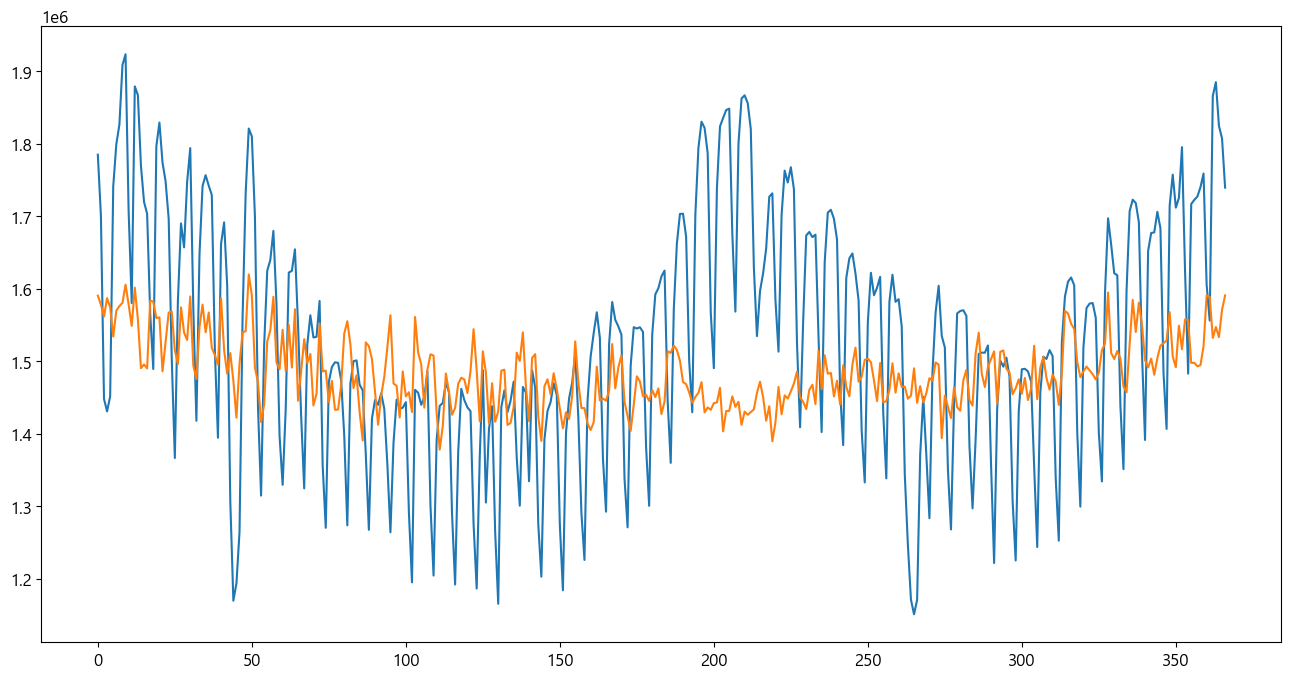

In [163]:
# 전력 예측값, 실제값 그래프
# 예측값 : 주황색, 실제값 : 파랑색
fig = plt.figure(figsize=(16,8))
plt.plot(y_)
plt.plot(y_pred)

In [164]:
# 예측값이 높아지는 인덱스번호 찾아서 적용(627)
y = df_temp192021['총전력량']
y_train = y.iloc[:627]
y_train

0      1464754
1      1751790
2      1812286
3      1816489
4      1603560
        ...   
622    1470723
623    1531625
624    1566767
625    1551502
626    1497508
Name: 총전력량, Length: 627, dtype: int64

In [165]:
X = df_temp192021[['평균기온(℃)','최저기온(℃)',	'최고기온(℃)']]
X_train = X.iloc[:627]
X_train

,평균기온(℃),최저기온(℃),최고기온(℃)
0,0.0,-2.3,2.4
1,-0.1,-2.8,4.2
2,0.5,-3.5,6.5
3,0.7,-4.1,3.9
4,2.0,-2.1,6.9
...,...,...,...
622,22.3,19.7,26.7
623,22.7,18.0,28.3
624,22.1,20.0,24.7
625,20.7,17.3,23.6


In [166]:
X_ = X.iloc[627:]
y_ = y.iloc[627:]

In [167]:
# 다항회귀 이용
from sklearn.preprocessing import PolynomialFeatures

In [168]:
P3 = PolynomialFeatures(degree=3) # 다항식의 차수를 3차로 조정

In [169]:
# x값 변환
X_tr = P3.fit_transform(X_train)
X_te = P3.fit_transform(X_)

In [170]:
# 선형회귀 적용
lin = LinearRegression()
lin.fit(X_tr,y_train)
y_pred = lin.predict(X_te)

In [171]:
y_ = pd.DataFrame(y_).reset_index(drop=True)

In [172]:
y_pred = pd.DataFrame(list(map(int,y_pred)))
y_pred.columns=['총전력량']

In [173]:
# r2스코어 적용
r2_score(y_,y_pred)

0.4351591708640825

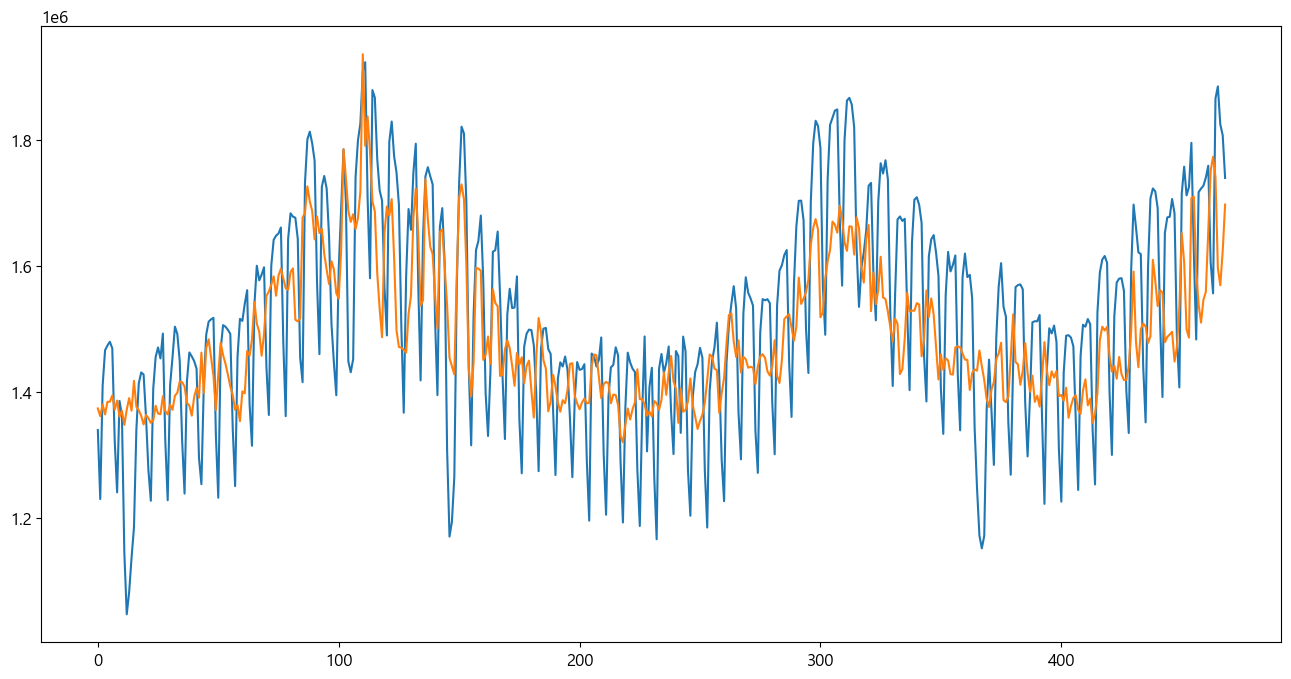

In [174]:
fig = plt.figure(figsize=(16,8))
plt.plot(y_)
plt.plot(y_pred)